In [2]:
from mylibs.dataloader_dict import *
from mylibs.trainer import *
import torch
import torch.nn as nn
import os
import torch.utils.data as data
from importlib import import_module
import matplotlib.pyplot as plt
import torch.optim as optim
import copy

vggish_input=import_module(".torchvggish.vggish_input","torchvggish-master_changed")
use_pretrained = True

#GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))
labels=["Speech","Music","Silence","Siren","Vehicle","Wind"]

vggish/embedding:0
vggish/embedding:0
Using cuda device


In [ ]:
#これを保存した
mymodel=trainer(_print=False,_lr=1,_classfilter=nn.Sequential(
                            nn.Linear(128,64),
                            nn.Dropout(p=0.50),
                            nn.Sigmoid(),
                            nn.Linear(64,6),
                            nn.Softmax(dim=1)
                            ) )
dataloader_dict=get_dataloader_dict(labels,datatype="train")



C:\Users\hase\git\MyVggishLearning\mylibs\dataloaders ['C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\evalMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic100Speech100.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic10Speech10.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSpeech.jb']
joblib.loadします


Epoch 1/50
train Loss: 1.754980 Acc: 0.389186
valid Loss: 1.721434 Acc: 0.534602
Epoch 2/50
train Loss: 1.726320 Acc: 0.556298
valid Loss: 1.694151 Acc: 0.601499
Epoch 3/50
train Loss: 1.714992 Acc: 0.597296
valid Loss: 1.678263 Acc: 0.610727
Epoch 4/50
train Loss: 1.709053 Acc: 0.606655
valid Loss: 1.667547 Acc: 0.613610
Epoch 5/50
train Loss: 1.704544 Acc: 0.615567
valid Loss: 1.659371 Acc: 0.617070
Epoch 6/50
train Loss: 1.701740 Acc: 0.619727
valid Loss: 1.653112 Acc: 0.619954
Epoch 7/50
train Loss: 1.698749 Acc: 0.628639
valid Loss: 1.647691 Acc: 0.621107
Epoch 8/50
train Loss: 1.696949 Acc: 0.635324
valid Loss: 1.643176 Acc: 0.655133
Epoch 9/50
train Loss: 1.694764 Acc: 0.646465
valid Loss: 1.639166 Acc: 0.656286
Epoch 10/50
train Loss: 1.693738 Acc: 0.647950
valid Loss: 1.635586 Acc: 0.656863
Epoch 11/50
train Loss: 1.692606 Acc: 0.650178
valid Loss: 1.632603 Acc: 0.659170
Epoch 12/50
train Loss: 1.690903 Acc: 0.654783
valid Loss: 1.629721 Acc: 0.656863
Epoch 13/50
train Loss: 1

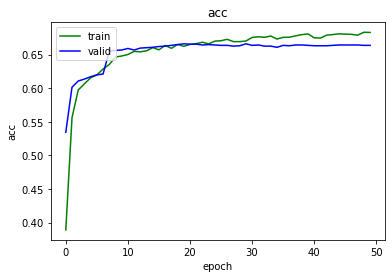

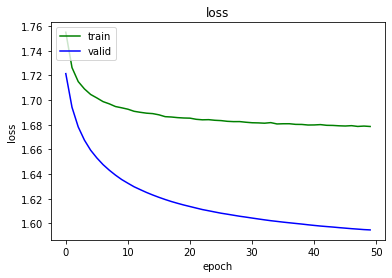

In [3]:
mymodel.train(dataloader_dict,_print=True,_num_epochs=50)
mymodel.graph()

In [ ]:
#hozon
import joblib
joblib.dump(mymodel,"tyuukannyou.jb", compress=3)

In [5]:
#よみこみ
import joblib
dataloader_dict=joblib.load("tyuukannyou.jb")

In [4]:
import numpy

dataloader_dict=get_dataloader_dict(labels,datatype="eval")
def eval(tr,dataloader_dict,labels):
    model=tr.model
    inputs,la = iter(dataloader_dict["train"]).__next__()
    model.eval()

    output = model(inputs)
    for h in range(len(output)):
        print("模範解答",labels[la[h].item()])
        ans=[[labels[i],output[h][i].item()] for i in range(len(labels))]
        ans.sort(key=lambda x: x[1],reverse=True)
        [print("{:7}:{:.5f}".format(ans[i][0],ans[i][1])) for i in range(len(ans))]
        print("----------------")

def eval2(tr,dataloader_dict,labels):
    model=tr.model
    acc=0
    count=0.0
    for inputs,la in dataloader_dict["train"]:
        
        model.eval()
        #print(inputs.shape)
        #貼り付け
        plt.imshow(inputs[0][0].to('cpu').detach().numpy().copy().T)
        #表示
        plt.show()
        output = model(inputs)
        for h in range(len(output)):
            #print("模範解答",labels[la[h].item()])
            ans=[[i,output[h][i].item()] for i in range(len(labels))]
            ans.sort(key=lambda x: x[1],reverse=True)
            acc+=1 if (ans[0][0]==la[h])else 0
            count+=1
            #[print("{:7}:{:.5f}".format(ans[i][0],ans[i][1])) for i in range(len(ans))]
            #print("----------------")
    print("正解数/入力数:{}/{:.0f}".format(acc,count))
    print("正解率:{:.3f}".format(acc/count))
#eval(mymodel,dataloader_dict,labels)        
eval2(mymodel,dataloader_dict,labels)


C:\Users\hase\git\MyVggishLearning\mylibs\dataloaders ['C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\evalMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic100Speech100.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic10Speech10.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSpeech.jb']
joblib.loadします
train用データの数：75
valid用データの数：42


NameError: name 'mymodel' is not defined

In [ ]:
eval(mymodel,dataloader_dict,labels)

In [ ]:
mymodel.model

In [10]:
from torchvision import models, transforms
vgg16 = models.vgg16(pretrained=True)
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

C:\Users\hase\git\MyVggishLearning\mylibs\dataloaders ['C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\evalMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic100Speech100.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic10Speech10.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSpeech.jb']
joblib.loadします
train用データの数：674
valid用データの数：347
Epoch 1/1
train Loss: 1.749437 Acc: 0.403001
valid Loss: 1.707009 Acc: 0.508651


In [6]:
nomodel=trainer(_print=False,_lr=1,_classfilter=nn.Sequential(
                            nn.Linear(128,64),
                            nn.Dropout(p=0.50),
                            nn.Sigmoid(),
                            nn.Linear(64,6),
                            nn.Softmax(dim=1)
                            ) )
#dataloader_dict=get_dataloader_dict(labels,datatype="eval")
eval(nomodel,dataloader_dict,labels)

模範解答 Vehicle
Wind   :0.23583
Silence:0.20053
Music  :0.19758
Siren  :0.12860
Vehicle:0.12783
Speech :0.10964
----------------
模範解答 Vehicle
Wind   :0.23164
Silence:0.20014
Music  :0.19257
Vehicle:0.13592
Siren  :0.12655
Speech :0.11319
----------------
模範解答 Vehicle
Wind   :0.22934
Silence:0.20522
Music  :0.19220
Vehicle:0.13273
Siren  :0.12866
Speech :0.11184
----------------
模範解答 Speech
Wind   :0.24147
Silence:0.20513
Music  :0.18645
Vehicle:0.13060
Siren  :0.12339
Speech :0.11296
----------------
模範解答 Silence
Wind   :0.23121
Silence:0.20967
Music  :0.19487
Vehicle:0.12734
Siren  :0.12481
Speech :0.11210
----------------
模範解答 Music
Wind   :0.22864
Silence:0.20987
Music  :0.18882
Vehicle:0.12942
Siren  :0.12860
Speech :0.11464
----------------
模範解答 Vehicle
Wind   :0.22793
Silence:0.20327
Music  :0.19721
Vehicle:0.13238
Siren  :0.12446
Speech :0.11475
----------------
模範解答 Speech
Wind   :0.23310
Silence:0.20524
Music  :0.18900
Vehicle:0.13463
Siren  :0.12655
Speech :0.11148
-------------